In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv("train.csv", parse_dates = ["date_time"])

In [141]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            33750 non-null  datetime64[ns]
 1   is_holiday           33750 non-null  object        
 2   humidity             33750 non-null  int64         
 3   wind_speed           33750 non-null  int64         
 4   wind_direction       33750 non-null  int64         
 5   visibility_in_miles  33750 non-null  int64         
 6   dew_point            33750 non-null  int64         
 7   temperature          33750 non-null  float64       
 8   rain_p_h             33750 non-null  float64       
 9   snow_p_h             33750 non-null  float64       
 10  clouds_all           33750 non-null  int64         
 11  weather_type         33750 non-null  object        
 12  air_pollution_index  33750 non-null  int64         
 13  traffic_volume       33750 non-

In [143]:
df["date_time"].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [144]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [145]:
data = df.copy()

In [146]:
data.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [147]:
data.drop(["is_holiday", "dew_point", "rain_p_h", "snow_p_h", "clouds_all"], axis = 1, inplace = True)

In [148]:
data.head()

,date_time,humidity,wind_speed,wind_direction,visibility_in_miles,temperature,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,89,2,329,1,288.28,Clouds,121,5545
1,2012-10-02 10:00:00,67,3,330,1,289.36,Clouds,178,4516
2,2012-10-02 11:00:00,66,3,329,2,289.58,Clouds,113,4767
3,2012-10-02 12:00:00,66,3,329,5,290.13,Clouds,20,5026
4,2012-10-02 13:00:00,65,3,329,7,291.14,Clouds,281,4918


In [150]:
data.isna().sum()

date_time              0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
temperature            0
weather_type           0
air_pollution_index    0
traffic_volume         0
dtype: int64

In [153]:
data.groupby(by = ["temperature", "traffic_volume", "humidity"]).agg((["min", "mean", "max"]))

wind_speed          wind_direction         \
                                           min mean max            min   mean   
temperature traffic_volume humidity                                             
0.00        284            76                0  0.0   0              0    0.0   
            291            70                0  0.0   0              0    0.0   
            361            78                2  2.0   2            320  320.0   
            434            83                2  2.0   2            220  220.0   
            734            77                3  3.0   3            310  310.0   
...                                        ...  ...  ..            ...    ...   
307.20      4634           100               2  2.0   2            197  197.0   
307.32      5201           88                1  1.0   1            202  202.0   
307.33      5173           100               1  1.0   1            202  202.0   
307.66      4858           66                5  5.0   5            125  125.0   
308.24      5982           66                5  5.0   5            125  125.0   

                                         visibility_in_miles           \
                                     max                 min mean max   
temperature traffic_volume humidity                                     
0.00        284            76          0                   3  3.0   3   
            291            70          0                   1  1.0   1   
            361            78        320                   1  1.0   1   
            434            83        220                   2  2.0   2   
            734            77        310                   1  1.0   1   
...                                  ...                 ...  ...  ..   
307.20      4634           100       197                   8  8.0   8   
307.32      5201           88        202                   7  7.0   7   
307.33      5173           100       202                   1  1.0   1   
307.66      4858           66        125                   5  5.0   5   
308.24      5982           66        125                   1  1.0   1   

                                    air_pollution_index              
                                                    min   mean  max  
temperature traffic_volume humidity                                  
0.00        284            76                       154  154.0  154  
            291            70                       250  250.0  250  
            361            78                        26   26.0   26  
            434            83                       151  151.0  151  
            734            77                        18   18.0   18  
...                                                 ...    ...  ...  
307.20      4634           100                       72   72.0   72  
307.32      5201           88                       124  124.0  124  
307.33      5173           100                      263  263.0  263  
307.66      4858           66                       264  264.0  264  
308.24      5982           66                        78   78.0   78  

[32116 rows x 12 columns]

In [236]:
weather = data["weather_type"].unique()

In [237]:
weather

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [238]:
kolonlar = data.columns[8], data.columns[7]

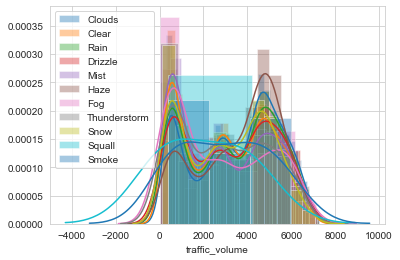

In [239]:
for w in weather:
        d = data[data["weather_type"] == w]["traffic_volume"]
        sns.distplot(d)

sns.set_style("whitegrid")
plt.legend(weather)

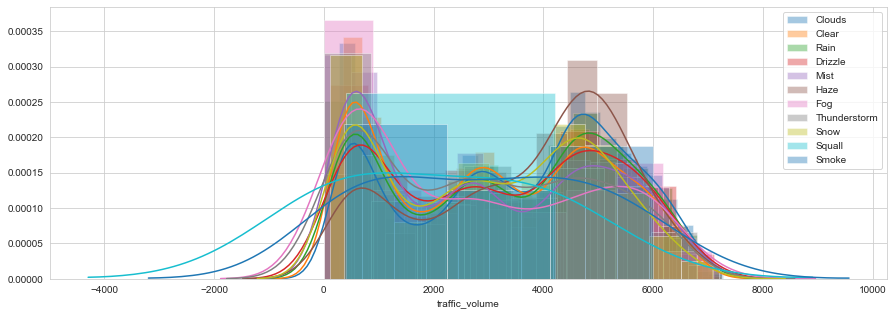

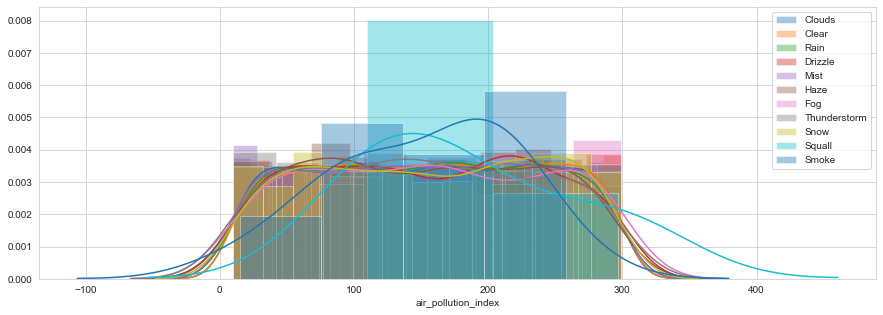

In [240]:
for kolon in kolonlar:
    plt.figure(figsize = (15, 5))
    for w in weather:
        sns.distplot(data[data["weather_type"]==w][kolon])
        plt.legend(weather)
    plt.show()
    

In [241]:
data.head()

,date_time,humidity,wind_speed,wind_direction,visibility_in_miles,temperature,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,89,2,329,1,288.28,Clouds,121,5545
1,2012-10-02 10:00:00,67,3,330,1,289.36,Clouds,178,4516
2,2012-10-02 11:00:00,66,3,329,2,289.58,Clouds,113,4767
3,2012-10-02 12:00:00,66,3,329,5,290.13,Clouds,20,5026
4,2012-10-02 13:00:00,65,3,329,7,291.14,Clouds,281,4918


## SCATTER PLOT

<AxesSubplot:xlabel='weather_type', ylabel='air_pollution_index'>

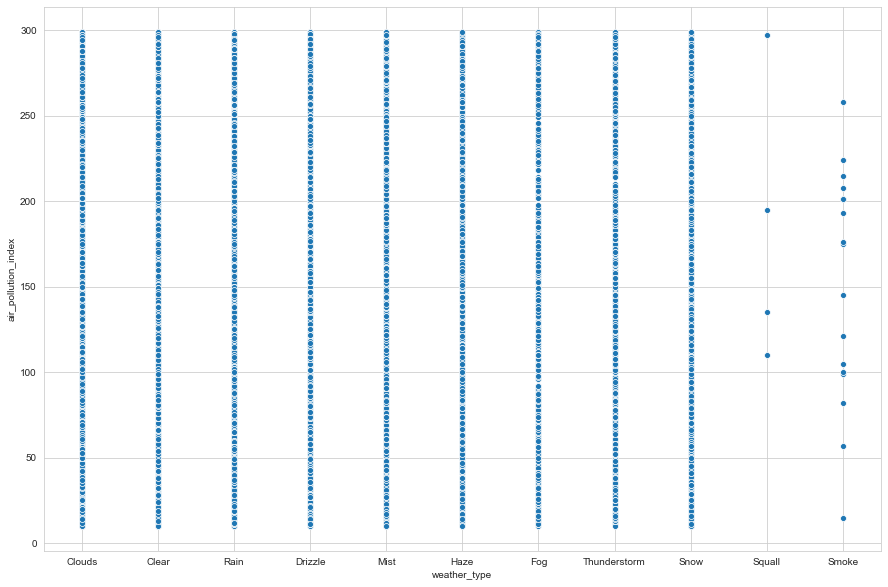

In [242]:
plt.figure(figsize = (15,  10))
sns.scatterplot(x = "weather_type", y = "air_pollution_index", data = data)

<AxesSubplot:xlabel='traffic_volume', ylabel='weather_type'>

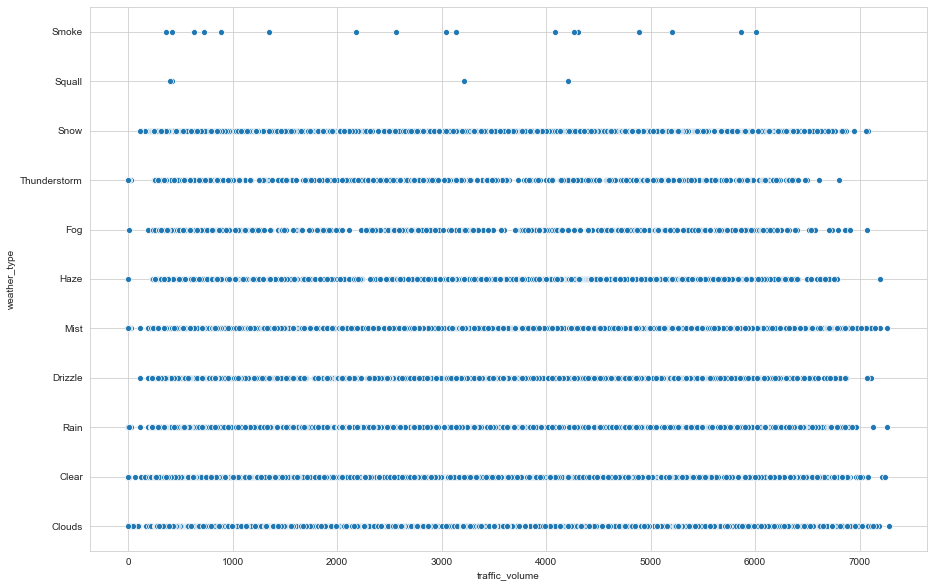

In [245]:
plt.figure(figsize = (15,  10))
sns.scatterplot(x = "traffic_volume", y = "weather_type", data = data)

<AxesSubplot:xlabel='weather_type', ylabel='humidity'>

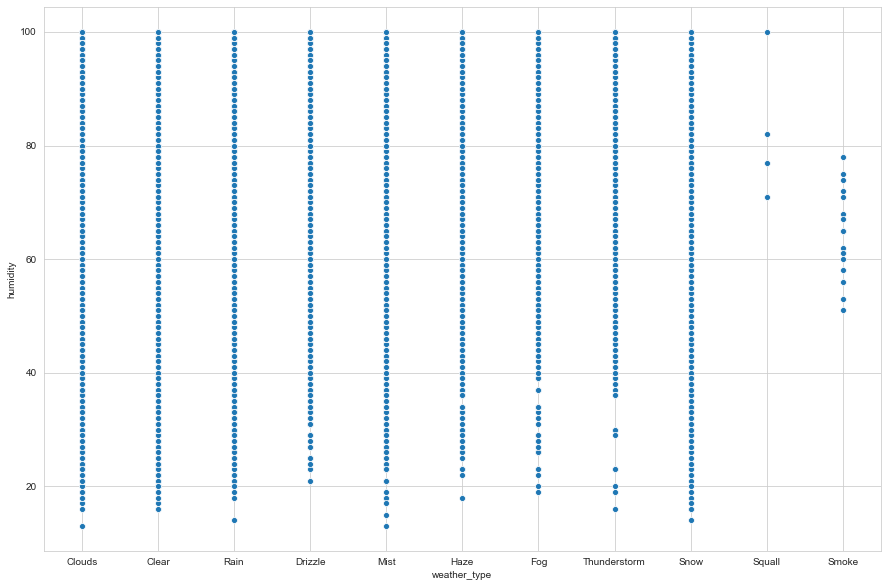

In [252]:
plt.figure(figsize = (15,  10))
sns.scatterplot(x = "weather_type", y = "humidity", data = data)